# Importing statements

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report


# Data Manipulation

In [37]:
data = pd.read_csv("Threats (1).csv")
data

,Unnamed: 0,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,40000,40001,0.012996,tcp,-,FIN,16,18,1540,1644,...,1,6,0,0,0,5,7,0,Normal,0
1,40001,40002,0.004119,tcp,-,FIN,12,12,1064,2260,...,1,1,0,0,0,3,8,0,Normal,0
2,40002,40003,0.000988,udp,dns,CON,2,2,146,178,...,1,2,0,0,0,7,2,0,Normal,0
3,40003,40004,3.415787,tcp,ssh,FIN,230,238,24344,29556,...,1,1,0,0,0,4,1,0,Normal,0
4,40004,40005,0.193943,tcp,-,FIN,72,74,4238,63618,...,1,5,0,0,0,6,12,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135336,175336,175337,0.000009,udp,dns,INT,2,0,114,0,...,13,24,0,0,0,24,24,0,Generic,1
135337,175337,175338,0.505762,tcp,-,FIN,10,8,620,354,...,1,2,0,0,0,1,1,0,Shellcode,1
135338,175338,175339,0.000009,udp,dns,INT,2,0,114,0,...,3,13,0,0,0,3,12,0,Generic,1
135339,175339,175340,0.000009,udp,dns,INT,2,0,114,0,...,14,30,0,0,0,30,30,0,Generic,1


In [38]:
columns_drop = {'Unnamed: 0','id'}
data = data.drop(columns=columns_drop,errors='ignore')
data = data.dropna()
data = data[data['service'] != '-']
data = data.drop_duplicates()

data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
2,0.000988,udp,dns,CON,2,2,146,178,3036.437382,31,...,1,2,0,0,0,7,2,0,Normal,0
3,3.415787,tcp,ssh,FIN,230,238,24344,29556,136.718127,31,...,1,1,0,0,0,4,1,0,Normal,0
5,0.001082,udp,dns,CON,2,2,146,178,2772.643321,31,...,1,2,0,0,0,1,3,0,Normal,0
6,0.003656,tcp,ftp-data,FIN,6,8,320,1946,3555.798785,31,...,1,4,0,0,0,7,3,0,Normal,0
7,0.000970,udp,dns,CON,2,2,146,178,3092.783525,31,...,1,3,0,0,0,6,2,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135214,0.989025,tcp,http,FIN,22,56,2424,68382,77.854453,62,...,1,1,0,0,1,21,1,0,Exploits,1
135248,2.013791,tcp,smtp,FIN,226,50,272070,3084,136.558356,62,...,1,1,0,0,0,18,1,0,DoS,1
135267,1.914309,tcp,smtp,FIN,74,30,69997,2132,53.805315,62,...,1,1,0,0,0,18,1,0,Exploits,1
135299,0.996503,tcp,pop3,FIN,20,30,942,16684,49.171955,62,...,1,1,0,0,0,7,1,0,Exploits,1


# Data Visuialization

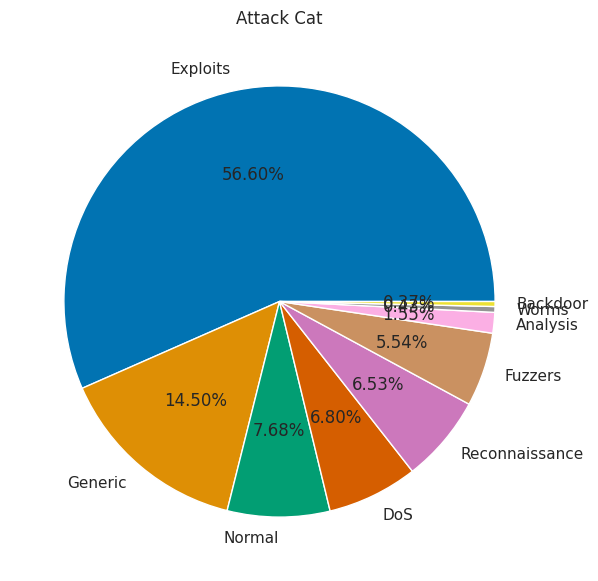

In [39]:
sns.set_theme()
sns.set_palette('colorblind')

attack_category_counts = data['attack_cat'].value_counts()

plt.figure(figsize=(7,7))
plt.title('Attack Cat')
plt.pie(attack_category_counts,labels=attack_category_counts.index,autopct='%1.2f%%')
plt.show()

Categories like Backdoor, Worms and Analysis have very few % in the data.<br>
Hence the model will find it hard to evalute from the following resultant decion tree.

# Encoding categorical values

In [40]:
cat_col = data.select_dtypes(exclude=['number']).columns
cat_col = ['proto', 'service', 'state']
encoder = OrdinalEncoder()
data[cat_col] = encoder.fit_transform(data[cat_col])

data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
2,0.000988,1.0,1.0,0.0,2,2,146,178,3036.437382,31,...,1,2,0,0,0,7,2,0,Normal,0
3,3.415787,0.0,10.0,1.0,230,238,24344,29556,136.718127,31,...,1,1,0,0,0,4,1,0,Normal,0
5,0.001082,1.0,1.0,0.0,2,2,146,178,2772.643321,31,...,1,2,0,0,0,1,3,0,Normal,0
6,0.003656,0.0,3.0,1.0,6,8,320,1946,3555.798785,31,...,1,4,0,0,0,7,3,0,Normal,0
7,0.000970,1.0,1.0,0.0,2,2,146,178,3092.783525,31,...,1,3,0,0,0,6,2,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135214,0.989025,0.0,4.0,1.0,22,56,2424,68382,77.854453,62,...,1,1,0,0,1,21,1,0,Exploits,1
135248,2.013791,0.0,8.0,1.0,226,50,272070,3084,136.558356,62,...,1,1,0,0,0,18,1,0,DoS,1
135267,1.914309,0.0,8.0,1.0,74,30,69997,2132,53.805315,62,...,1,1,0,0,0,18,1,0,Exploits,1
135299,0.996503,0.0,6.0,1.0,20,30,942,16684,49.171955,62,...,1,1,0,0,0,7,1,0,Exploits,1


# Training the model and Testing it

## Making of X and Y components of train nad test

In [41]:
X = data.drop(['attack_cat','label'],axis=1)
y = data['attack_cat']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)

print(f"x_train:\n{x_train}\nx_test:\n{x_test}\ny_train:\n{y_train}\ny_train:\n{y_test}")

x_train:
             dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
90084   0.265140    0.0      4.0    1.0     10      6    1078     268   
58859   0.213855    0.0      4.0    1.0     10     10     806    4266   
27722   0.447146    0.0      4.0    1.0     10      8     914    1292   
98774   0.262680    0.0      4.0    1.0     10      8     970    1026   
84859   1.774146    0.0      8.0    1.0     32     22   18775    1744   
...          ...    ...      ...    ...    ...    ...     ...     ...   
15427   0.573815    0.0      4.0    1.0     10      8     808    2340   
116843  0.634043    0.0      2.0    1.0     10      8    2642     462   
98866   2.213754    0.0      4.0    1.0     10     10    1134     928   
36236   1.049938    0.0      8.0    1.0     66     26   62199    2114   
89244   1.648431    0.0      4.0    1.0     24     64    2576   78236   

             rate  sttl  ...  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  \
90084   56.573886   254  ...      

# Decision Tree Implementation

In [42]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

## Model Evaluvation

In [43]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average='macro')
recall = recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

print(f"Accuracy:{accuracy}\nPrecision:{precision}\nRecall:{recall}\nF1 Score:{f1}")

Accuracy:0.7690408110215753
Precision:0.5722239654945742
Recall:0.5847718958628392
F1 Score:0.5767502774555942


## Classification report

In [44]:
classification_report = classification_report(y_test,y_pred)

print(classification_report)

                precision    recall  f1-score   support

      Analysis       0.28      0.29      0.28       119
      Backdoor       0.36      0.28      0.31        29
           DoS       0.37      0.41      0.39       523
      Exploits       0.85      0.84      0.85      4355
       Fuzzers       0.68      0.70      0.69       427
       Generic       0.94      0.95      0.95      1115
        Normal       0.65      0.67      0.66       591
Reconnaissance       0.49      0.48      0.48       502
         Worms       0.52      0.67      0.59        33

      accuracy                           0.77      7694
     macro avg       0.57      0.58      0.58      7694
  weighted avg       0.77      0.77      0.77      7694



## Confusion Matrix

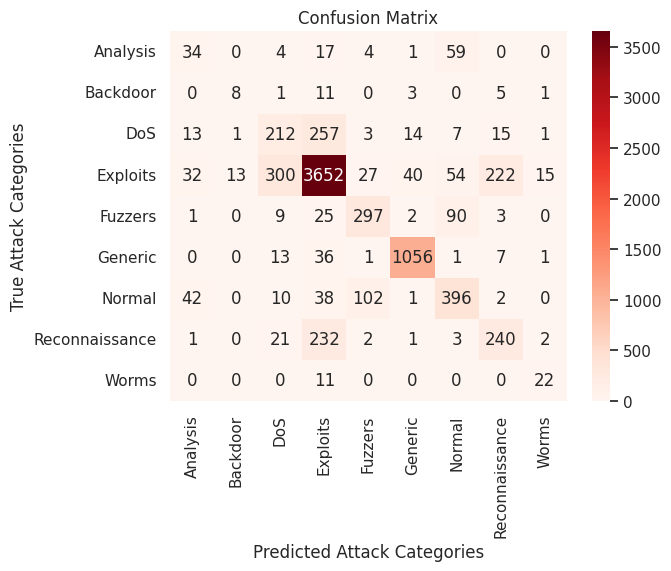

In [45]:
confmat = confusion_matrix(y_test,y_pred)
classes = sorted(y_test.unique())
sns.heatmap(confmat,xticklabels=classes,annot=True,fmt='d',cmap='Reds',yticklabels=classes)
plt.xlabel('Predicted Attack Categories')
plt.ylabel('True Attack Categories')
plt.title('Confusion Matrix')
plt.show()